In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
import seaborn as sns  
from matplotlib.ticker import MaxNLocator, FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker
import palettable 

type_colors = {'all':'k','main':'#fc8d62','asso':'#66c2a5','new':'grey'}

In [2]:
key_data = pd.read_csv('Key_Data.csv')
V0 = pd.read_csv('regression_variables.csv')

In [3]:
thd = 1990
V2000 = V0['mentee_id'][V0.birthYear_mte<=thd]
key_data['paper_ratio_mte'] = key_data['paper_num_mte']/key_data['communitys_paper_num_mte']
key_data = key_data[(key_data.paper_num_mte>0)&(key_data.mentee_id.isin(V2000))]

#### All

In [4]:
target_info = key_data[['mentee_id','mentor_id','community','type','paper_ratio_mte','paper_num_mte','communitys_paper_num_mte']][key_data.paper_num_mte>0]

In [5]:
def type_count(tp_df):
    num_new = len(tp_df[tp_df.type=='new'])
    
    return num_new

num_new = target_info.groupby(['mentee_id','mentor_id']).apply(type_count).reset_index(name='num_new')

In [6]:
mentee_with_new = list(set(num_new['mentee_id'][num_new.num_new>0]))
mentee_without_new = list(set(num_new['mentee_id'][num_new.num_new==0]))

In [7]:
def paper_contri(tp_df):
    contri_main = np.sum(tp_df['paper_ratio_mte'][tp_df.type=='main'])
    contri_asso = np.sum(tp_df['paper_ratio_mte'][tp_df.type=='associate'])
    contri_new = np.sum(tp_df['paper_ratio_mte'][tp_df.type=='new'])
    
    return contri_main,contri_asso,contri_new

In [8]:
paper_contri_ratio = target_info.groupby(['mentee_id','mentor_id']).apply(paper_contri).reset_index(name='paper_contri_ratio')

In [9]:
df_list = []
tp_array = paper_contri_ratio.values
for k in tp_array:
    tp_k = [k[0],k[1]]
    tp_k.extend(list(k[2]))
    df_list.append(tp_k)

In [10]:
paper_contri_ratio = pd.DataFrame(df_list,columns=['mentee_id','mentor_id','main','asso','new'])
paper_contri_ratio['total_contri'] = paper_contri_ratio['main'] + paper_contri_ratio['asso'] + paper_contri_ratio['new']

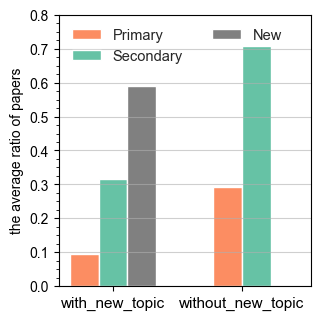

In [11]:
#with_new
data_with_new = paper_contri_ratio[(paper_contri_ratio['mentee_id'].isin(mentee_with_new))&(paper_contri_ratio.new<1)&(paper_contri_ratio.new>0)]

#without_new
data_without_new = paper_contri_ratio[(paper_contri_ratio['mentee_id'].isin(mentee_without_new))&(paper_contri_ratio.new==0)]

data_tp = data_with_new
mean_main_with_new = np.mean(data_tp['main'])
mean_asso_with_new = np.mean(data_tp['asso'])
mean_new_with_new = np.mean(data_tp['new'])

data_tp = data_without_new
mean_main_without_new = np.mean(data_tp['main'])
mean_asso_without_new = np.mean(data_tp['asso'])
mean_new_without_new = np.mean(data_tp['new'])


classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_main = np.array([1,1+5*width])
ax.bar(x_main, [mean_main_with_new,mean_main_without_new], width,color=type_colors['main'],label='Primary')

x_associate = np.array([1+width,1+6*width])
ax.bar(x_associate, [mean_asso_with_new,mean_asso_without_new], width,color=type_colors['asso'],label='Secondary')

x_new = np.array([1+2*width,1+7*width])
ax.bar(x_new, [mean_new_with_new,mean_new_without_new], width,color=type_colors['new'],label='New')

#fig ticks set
ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylabel('the average ratio of papers')
ax.set_xticks([1+width,1+5.5*width], classes,fontsize=11)

ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)

# ax.set_title(f'All')
# fig.savefig('result_data_plot/new_plot(202403)/All (the average ratio of papers).pdf')
plt.show()

#### High impact

In [12]:
q10,q25,q50,q75,q95 = key_data[['mentee_id','total_cits5_mte']].drop_duplicates()['total_cits5_mte'].quantile([.1,.25,.5,.75,.95])

In [13]:
elites = key_data[['mentee_id','mentor_id']][key_data.total_cits5_mte>=q75].drop_duplicates().values[:,0]

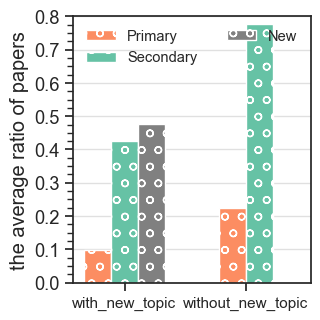

In [14]:
#with_new
data_with_new = paper_contri_ratio[(paper_contri_ratio['mentee_id'].isin(mentee_with_new))&(paper_contri_ratio.new<1)
                                  &(paper_contri_ratio['mentee_id'].isin(elites))]

#without_new
data_without_new = paper_contri_ratio[(paper_contri_ratio['mentee_id'].isin(mentee_without_new))&(paper_contri_ratio.new==0)
                                     &(paper_contri_ratio['mentee_id'].isin(elites))]
data_tp = data_with_new
mean_main_with_new = np.mean(data_tp['main'])
mean_asso_with_new = np.mean(data_tp['asso'])
mean_new_with_new = np.mean(data_tp['new'])

data_tp = data_without_new
mean_main_without_new = np.mean(data_tp['main'])
mean_asso_without_new = np.mean(data_tp['asso'])
mean_new_without_new = np.mean(data_tp['new'])

classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_main = np.array([1,1+5*width])
ax.bar(x_main, [mean_main_with_new,mean_main_without_new], width,color=type_colors['main'],label='Primary',hatch='o')

x_associate = np.array([1+width,1+6*width])
ax.bar(x_associate, [mean_asso_with_new,mean_asso_without_new], width,color=type_colors['asso'],label='Secondary',hatch='o')

x_new = np.array([1+2*width,1+7*width])
ax.bar(x_new, [mean_new_with_new,mean_new_without_new], width,color=type_colors['new'],label='New',hatch='o')

#fig ticks set
ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('the average ratio of papers')
ax.set_xticks([1+width,1+5.5*width], classes,fontsize=11)
# ax.set_title(f'ALL (ratio of with_new = {round(ratio_with_new,2)})')
# fig.savefig('result_data_plot/new_plot(202403)/High-impact (the average ratio of papers).pdf')
plt.show()

### mean credit ratio

In [15]:
target_info = key_data[['mentee_id','mentor_id','community','type','credit_mte','total_credit_mte']]
credit_ratio_mte = list(target_info['credit_mte']/target_info['total_credit_mte'])
target_info.loc[:,'credit_ratio_mte'] = credit_ratio_mte

/var/folders/8n/d3_ymw7s7tn0tz9t554ghv5m0000gn/T/ipykernel_54148/1855097096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_info.loc[:,'credit_ratio_mte'] = credit_ratio_mte


In [16]:
def type_count(tp_df):
    num_new = len(tp_df[tp_df.type=='new'])
    
    return num_new

num_new = target_info.groupby(['mentee_id','mentor_id']).apply(type_count).reset_index(name='num_new')

In [17]:
num_new.head(3)

,mentee_id,mentor_id,num_new
0,A1002422011,A1897971127,0
1,A1002422011,A1966502692,0
2,A100328954,A1993268291,3


In [18]:
mentee_with_new = list(set(num_new['mentee_id'][num_new.num_new>0]))
mentee_without_new = list(set(num_new['mentee_id'][num_new.num_new==0]))

In [19]:
def topic_contri(tp_df):
    contri_main = np.sum(tp_df['credit_ratio_mte'][tp_df.type=='main'])
    contri_asso = np.sum(tp_df['credit_ratio_mte'][tp_df.type=='associate'])
    contri_new = np.sum(tp_df['credit_ratio_mte'][tp_df.type=='new'])
    
    return contri_main,contri_asso,contri_new

topic_contri_ratio = target_info.groupby(['mentee_id','mentor_id']).apply(topic_contri).reset_index(name='topic_contri_ratio')

In [20]:
df_list = []
tp_array = topic_contri_ratio.values
for k in tp_array:
    tp_k = [k[0],k[1]]
    tp_k.extend(list(k[2]))
    df_list.append(tp_k)
    
topic_contri_ratio = pd.DataFrame(df_list,columns=['mentee_id','mentor_id','main','asso','new'])

In [21]:
topic_contri_ratio.head(3)

,mentee_id,mentor_id,main,asso,new
0,A1002422011,A1897971127,0.606829,0.393171,0.000000
1,A1002422011,A1966502692,0.017778,0.982222,0.000000
2,A100328954,A1993268291,0.000000,0.019098,0.980902


In [22]:
#with_new
data_with_new = topic_contri_ratio[(topic_contri_ratio['mentee_id'].isin(mentee_with_new))&(topic_contri_ratio.new<1)
                                  &(~topic_contri_ratio['mentee_id'].isin(elites))]

#without_new
data_without_new = topic_contri_ratio[(topic_contri_ratio['mentee_id'].isin(mentee_without_new))&(topic_contri_ratio.new==0)
                                     &(~topic_contri_ratio['mentee_id'].isin(elites))]
data_tp = data_with_new
mean_main_with_new = np.mean(data_tp['main'])
mean_asso_with_new = np.mean(data_tp['asso'])
mean_new_with_new = np.mean(data_tp['new'])

error_main_with_new = stats.sem(data_tp['main'])
error_asso_with_new = stats.sem(data_tp['asso'])
error_new_with_new = stats.sem(data_tp['new'])

data_tp = data_without_new
mean_main_without_new = np.mean(data_tp['main'])
mean_asso_without_new = np.mean(data_tp['asso'])
mean_new_without_new = np.mean(data_tp['new'])

error_main_without_new = stats.sem(data_tp['main'])
error_asso_without_new = stats.sem(data_tp['asso'])
error_new_without_new = stats.sem(data_tp['new'])

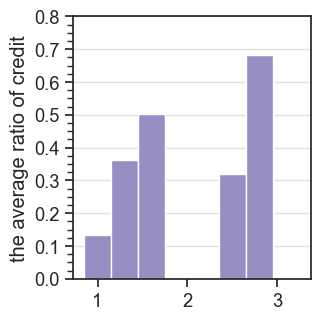

In [23]:
classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot

x_with_new_topic = np.array([1,1+1*width,1+2*width])
ax.bar(x_with_new_topic, [mean_main_with_new,mean_asso_with_new,mean_new_with_new], width,color='#998ec3',label='with_new_topic')

x_without_new_topic = np.array([1+5*width,1+6*width,1+7*width])
ax.bar(x_without_new_topic , [mean_main_without_new,mean_asso_without_new,mean_new_without_new], width,color='#998ec3',label='without_new_topic')


#fig ticks set
# ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('the average ratio of credit')
plt.show()

#### High impact

In [24]:
q10,q25,q50,q80,q95 = key_data[['mentee_id','total_cits5_mte']].drop_duplicates()['total_cits5_mte'].quantile([.1,.25,.5,.80,.95])
elites = key_data[['mentee_id','mentor_id']][key_data.total_cits5_mte>=q80].drop_duplicates().values[:,0]

In [25]:
#with_new
data_with_new = topic_contri_ratio[(topic_contri_ratio['mentee_id'].isin(mentee_with_new))&(topic_contri_ratio.new<1)
                                  &(topic_contri_ratio['mentee_id'].isin(elites))]

#without_new
data_without_new = topic_contri_ratio[(topic_contri_ratio['mentee_id'].isin(mentee_without_new))&(topic_contri_ratio.new==0)
                                     &(topic_contri_ratio['mentee_id'].isin(elites))]

In [26]:
data_tp = data_with_new
mean_main_with_new_Elite = np.mean(data_tp['main'])
mean_asso_with_new_Elite = np.mean(data_tp['asso'])
mean_new_with_new_Elite = np.mean(data_tp['new'])

error_main_with_new_Elite = stats.sem(data_tp['main'])
error_asso_with_new_Elite = stats.sem(data_tp['asso'])
error_new_with_new_Elite = stats.sem(data_tp['new'])

data_tp = data_without_new
mean_main_without_new_Elite = np.mean(data_tp['main'])
mean_asso_without_new_Elite = np.mean(data_tp['asso'])
mean_new_without_new_Elite = np.mean(data_tp['new'])

error_main_without_new_Elite = stats.sem(data_tp['main'])
error_asso_without_new_Elite = stats.sem(data_tp['asso'])
error_new_without_new_Elite = stats.sem(data_tp['new'])

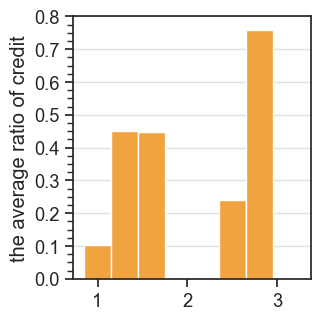

In [27]:
classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_with_new_topic = np.array([1,1+1*width,1+2*width])
ax.bar(x_with_new_topic, [mean_main_with_new_Elite,mean_asso_with_new_Elite,mean_new_with_new_Elite], width,color='#f1a340',label='with_new_topic')

x_without_new_topic = np.array([1+5*width,1+6*width,1+7*width])
ax.bar(x_without_new_topic , [mean_main_without_new_Elite,mean_asso_without_new_Elite,mean_new_without_new_Elite], width,color='#f1a340',label='without_new_topic')


#fig ticks set
# ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('the average ratio of credit')
plt.show()

#### Merge Plot

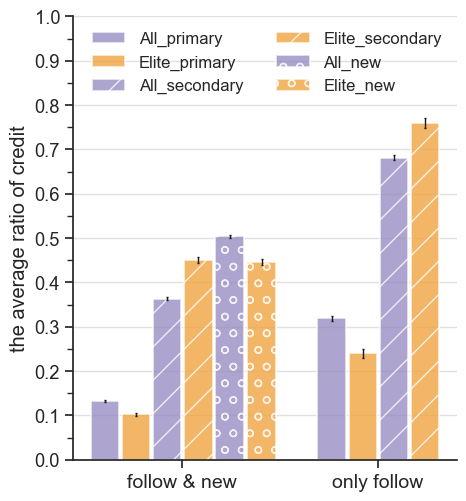

In [28]:
classes = ['follow & new','only follow']
width = 0.3  # the width of the bars: can also be len(x) sequence
error_kw = {'ecolor': 'k', 'elinewidth': 1, 'capsize': 1, 'capthick': 1}

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.65*7,0.7*7])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
# mean_main_with_new
x = 1
ax.bar(x, mean_main_with_new, width,color='#998ec3',fill=1,yerr=error_main_with_new,error_kw = error_kw,
      label='All_primary',lw=1.2,alpha=0.8)

# mean_main_with_new_Elite
x = 1+1*width+0.03
ax.bar(x, mean_main_with_new_Elite, width,color='#f1a340',fill=1,yerr=error_main_with_new_Elite,error_kw = error_kw,
      label='Elite_primary',lw=1.2,alpha=0.8)

# mean_asso_with_new
x = 1+2*width+0.06
ax.bar(x, mean_asso_with_new, width,color='#998ec3',hatch='/',fill=1,yerr=error_asso_with_new,error_kw = error_kw,
      label='All_secondary',lw=1.2,alpha=0.8)

# mean_asso_with_new_Elite
x = 1+3*width+0.09
ax.bar(x, mean_asso_with_new_Elite, width,color='#f1a340',hatch='/',fill=1,yerr=error_asso_with_new_Elite,error_kw = error_kw,
      label='Elite_secondary',lw=1.2,alpha=0.8)

# mean_new_with_new
x = 1+4*width+0.12
ax.bar(x, mean_new_with_new, width,color='#998ec3',hatch='o',fill=1,yerr=error_new_with_new,error_kw = error_kw,
      label='All_new',lw=1.2,alpha=0.8)

# mean_asso_with_new_Elite
x = 1+5*width+0.16
ax.bar(x, mean_new_with_new_Elite, width,color='#f1a340',hatch='o',fill=1,yerr=error_new_with_new_Elite,error_kw = error_kw,
      label='Elite_new',lw=1.2,alpha=0.8)


# mean_main_without_new
x = 1+8*width
ax.bar(x, mean_main_without_new, width,color='#998ec3',fill=1,yerr=error_main_without_new,error_kw = error_kw,
      lw=1.2,alpha=0.8)

# mean_main_without_new_Elite
x = 1+9*width+0.03
ax.bar(x, mean_main_without_new_Elite, width,color='#f1a340',fill=1,yerr=error_main_without_new_Elite,error_kw = error_kw,
      lw=1.2,alpha=0.8)

# mean_asso_without_new
x = 1+10*width+0.06
ax.bar(x, mean_asso_without_new, width,color='#998ec3',hatch='/',fill=1,yerr=error_asso_without_new,error_kw = error_kw,
      lw=1.2,alpha=0.8)

# mean_asso_without_new_Elite
x = 1+11*width+0.09
ax.bar(x, mean_asso_without_new_Elite, width,color='#f1a340',hatch='/',fill=1,yerr=error_asso_without_new_Elite,error_kw = error_kw,
      lw=1.2,alpha=0.8) #edgecolor='#f1a340',

ax.set_ylim([0,1.0])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
# 隐藏右侧和顶部边框
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# sns.despine(left=True, bottom=True)
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('the average ratio of credit')
ax.set_xticks([1+2.5*width+0.07,1+9.5*width+0.04], classes,fontsize=14)
plt.legend(frameon=0,ncol=2,fontsize=12)
# fig.savefig('result_data_plot/new_plot/High-impact (the average ratio of cits) (mergeplot).pdf')
plt.show()

In [29]:
key_data = pd.read_csv('Key_data.csv')

In [30]:
data_all = key_data[['mentee_id','mentor_id','credit_mte','type']]

In [31]:
with_new = data_all[['mentee_id','mentor_id']][data_all.type=='new'].drop_duplicates()
with_all = data_all[['mentee_id','mentor_id']]

with_all_tuple = set([tuple(k) for k in with_all.values]) 
with_new_tuple = set([tuple(k) for k in with_new.values])
without_new = pd.DataFrame(list(with_all_tuple - with_new_tuple),columns=['mentee_id','mentor_id'])

In [32]:
def find_max(tp_df):
    tp_df = tp_df.sort_values(by='credit_mte',ascending=0)
    out_type = tp_df['type'].values[0]
    return out_type

In [33]:
with_new_all = with_new.merge(data_all,on=['mentee_id','mentor_id'],how='left')
without_new_all = without_new.merge(data_all,on=['mentee_id','mentor_id'],how='left')

In [34]:
type_max = with_new_all.groupby(['mentee_id','mentor_id']).apply(find_max).reset_index(name='type with max credit')
type_max_count = type_max.groupby('type with max credit').size().reset_index(name='Count')
type_max_count['ratio'] = type_max_count['Count']/len(type_max)
type_max_count_with_new = type_max_count

In [35]:
type_max = without_new_all.groupby(['mentee_id','mentor_id']).apply(find_max).reset_index(name='type with max credit')
type_max_count = type_max.groupby('type with max credit').size().reset_index(name='Count')
type_max_count['ratio'] = type_max_count['Count']/len(type_max)
type_max_count_without_new = type_max_count

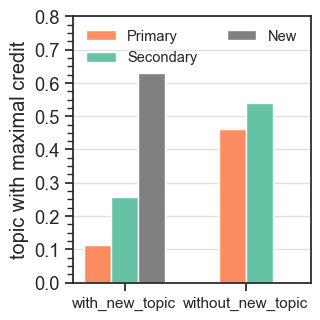

In [36]:
classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_main = np.array([1,1+5*width])
y_main0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='main'])[0]
y_main1 = np.array(type_max_count_without_new['ratio'][type_max_count_without_new['type with max credit']=='main'])[0]
ax.bar(x_main, [y_main0,y_main1], width,color=type_colors['main'],label='Primary')

x_associate = np.array([1+width,1+6*width])
# y_associate = np.array(type_max_count['ratio'][type_max_count['type with max credit']=='associate'])
y_associate0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='associate'])[0]
y_associate1 = np.array(type_max_count_without_new['ratio'][type_max_count_without_new['type with max credit']=='associate'])[0]
ax.bar(x_associate, [y_associate0,y_associate1], width,color=type_colors['asso'],label='Secondary')

x_new = np.array([1+2*width,1+7*width])
y_new0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='new'])[0]
y_new1 = np.array(0)
ax.bar(x_new, [y_new0,y_new1], width,color=type_colors['new'],label='New')

#fig ticks set
ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('topic with maximal credit')
ax.set_xticks([1+width,1+5.5*width], classes,fontsize=11)
# ax.set_title(f'All')
# fig.savefig('result_data_plot/new_plot(202403)/All (topic with maximal credit).pdf')
plt.show()

In [37]:
q10,q25,q50,q75,q95 = key_data['total_cits5_mte'].drop_duplicates().quantile([.1,.25,.5,.75,.95])
elites = key_data[['mentee_id','mentor_id','credit_mte','type']][(key_data.total_cits5_mte>=q95)]
                                             # &(key_data.total_credit_mte>=key_data.total_credit_mto)]

In [38]:
with_new = elites[['mentee_id','mentor_id']][elites.type=='new'].drop_duplicates()
with_all = elites[['mentee_id','mentor_id']]

with_all_tuple = set([tuple(k) for k in with_all.values]) 
with_new_tuple = set([tuple(k) for k in with_new.values])
without_new = pd.DataFrame(list(with_all_tuple - with_new_tuple),columns=['mentee_id','mentor_id'])

In [39]:
with_new_all = with_new.merge(elites,on=['mentee_id','mentor_id'],how='left')
without_new_all = without_new.merge(elites,on=['mentee_id','mentor_id'],how='left')

In [40]:
type_max = with_new_all.groupby(['mentee_id','mentor_id']).apply(find_max).reset_index(name='type with max credit')
type_max_count = type_max.groupby('type with max credit').size().reset_index(name='Count')
type_max_count['ratio'] = type_max_count['Count']/len(type_max)
type_max_count_with_new = type_max_count

In [41]:
type_max = without_new_all.groupby(['mentee_id','mentor_id']).apply(find_max).reset_index(name='type with max credit')
type_max_count = type_max.groupby('type with max credit').size().reset_index(name='Count')
type_max_count['ratio'] = type_max_count['Count']/len(type_max)
type_max_count_without_new = type_max_count

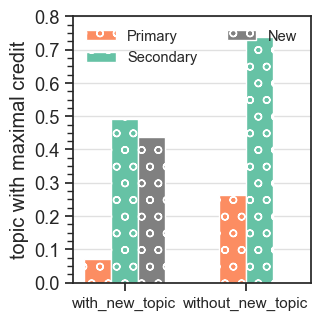

In [42]:
classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_main = np.array([1,1+5*width])
y_main0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='main'])[0]
y_main1 = np.array(type_max_count_without_new['ratio'][type_max_count_without_new['type with max credit']=='main'])[0]
ax.bar(x_main, [y_main0,y_main1], width,color=type_colors['main'],label='Primary',hatch='o')

x_associate = np.array([1+width,1+6*width])
# y_associate = np.array(type_max_count['ratio'][type_max_count['type with max credit']=='associate'])
y_associate0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='associate'])[0]
y_associate1 = np.array(type_max_count_without_new['ratio'][type_max_count_without_new['type with max credit']=='associate'])[0]
ax.bar(x_associate, [y_associate0,y_associate1], width,color=type_colors['asso'],label='Secondary',hatch='o')

x_new = np.array([1+2*width,1+7*width])
y_new0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='new'])[0]
y_new1 = np.array(0)
ax.bar(x_new, [y_new0,y_new1], width,color=type_colors['new'],label='New',hatch='o')

#fig ticks set
ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('topic with maximal credit')
ax.set_xticks([1+width,1+5.5*width], classes,fontsize=11)
# ax.set_title(f'High-impact Surpasser')
# fig.savefig('result_data_plot/new_plot(202403)/High-impact(topic with maximal credit).pdf')
plt.show()